In [1]:
import pickle
from nltk import Tree
from icecream import ic
import sys
import os
import sympy as sp
from collections import Counter
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
ampl_prefix_file = "../../data.nosync/prefix/QED_amplitudes_prefix.pickle"
sqampl_prefix_file = "../../data.nosync/prefix/QED_sqamplitudes_prefix.pickle"

amplitudes_prefix = []
sqamplitudes_prefix = []
with open(ampl_prefix_file, 'rb') as f:
    try:
        while True:
            amplitudes_prefix.append(pickle.load(f))
    except EOFError:
        pass

with open(sqampl_prefix_file, 'rb') as f:
    try:
        while True:
            sqamplitudes_prefix.append(pickle.load(f))
    except EOFError:
        pass

In [3]:
figures_folder = "../figures/"
processes = ["1to2", "2to1", "2to2", "2to3", "3to2"]

In [4]:
ampl_hprefix_file = "../../data.nosync/hybrid_prefix/QED_amplitudes_hybrid_prefix.pickle"
sqampl_hprefix_file = "../../data.nosync/hybrid_prefix/QED_sqamplitudes_hybrid_prefix.pickle"

amplitudes_hprefix = []
sqamplitudes_hprefix = []
with open(ampl_hprefix_file, 'rb') as f:
    try:
        while True:
            amplitudes_hprefix.append(pickle.load(f))
    except EOFError:
        pass

with open(sqampl_hprefix_file, 'rb') as f:
    try:
        while True:
            sqamplitudes_hprefix.append(pickle.load(f))
    except EOFError:
        pass

In [5]:
ctrs_ampl_prefix = []
ctrs_sqampl_prefix = []
for ampl in tqdm(amplitudes_prefix):
    ctr_ampl = Counter(ampl[0])
    for a in ampl[1:]:
        ctr_ampl.update(a)
    ctrs_ampl_prefix.append(ctr_ampl)

for sqampl in tqdm(sqamplitudes_prefix):
    ctr_sqampl = Counter(sqampl[0])
    for a in sqampl[1:]:
        ctr_sqampl.update(a)
    ctrs_sqampl_prefix.append(ctr_sqampl)

ctrs_ampl_hprefix = []
ctrs_sqampl_hprefix = []
for ampl in tqdm(amplitudes_hprefix):
    ctr_ampl = Counter(ampl[0])
    for a in ampl[1:]:
        ctr_ampl.update(a)
    ctrs_ampl_hprefix.append(ctr_ampl)

for sqampl in tqdm(sqamplitudes_hprefix):
    ctr_sqampl = Counter(sqampl[0])
    for a in sqampl[1:]:
        ctr_sqampl.update(a)
    ctrs_sqampl_hprefix.append(ctr_sqampl)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
def counter_get_total(counter) -> int:
    ctr = 0
    for x in counter:
        ctr = ctr + counter[x]
    return ctr

In [7]:
lengths_ampl_prefix = [[len(a) for a in ampls] for ampls in amplitudes_prefix]
lengths_sqampl_prefix = [[len(a) for a in sqampls] for sqampls in sqamplitudes_prefix]
lengths_ampl_hprefix = [[len(a) for a in ampls] for ampls in amplitudes_hprefix]
lengths_sqampl_hprefix = [[len(a) for a in sqampls] for sqampls in sqamplitudes_hprefix]

# Amplitudes

In [8]:
for ctr in ctrs_ampl_prefix:
    total = counter_get_total(ctr)
    prod_percentage = ctr['Prod'] / total
    sum_percentage = ctr['Sum'] / total
    ic(prod_percentage)
    ic(sum_percentage)

ic| prod_percentage: 0.24
ic| sum_percentage: 0.0
ic| prod_percentage: 0.24
ic| sum_percentage: 0.0
ic| prod_percentage: 0.2050028656205338
ic| sum_percentage: 0.04784352986411881
ic| prod_percentage: 0.20349710090593018
ic| sum_percentage: 0.048005969272300116
ic| prod_percentage: 0.20353921933866523
ic| sum_percentage: 0.04800045570253173


In [9]:
for ctr in ctrs_ampl_hprefix:
    total = counter_get_total(ctr)
    prod_percentage = ctr['Prod'] / total
    sum_percentage = ctr['Sum'] / total
    prod_percentage_2 = ctr['Prod('] / total
    sum_percentage_2 = ctr['Sum('] / total
    ic(prod_percentage+prod_percentage_2)
    ic(sum_percentage+sum_percentage_2)

ic| prod_percentage+prod_percentage_2: 0.047619047619047616
ic| sum_percentage+sum_percentage_2: 0.0
ic| prod_percentage+prod_percentage_2: 0.047619047619047616
ic| sum_percentage+sum_percentage_2: 0.0
ic| prod_percentage+prod_percentage_2: 0.05490576421350146
ic| sum_percentage+sum_percentage_2: 0.022500747363843894
ic| prod_percentage+prod_percentage_2: 0.054961401071922676
ic| sum_percentage+sum_percentage_2: 0.016147297507685496
ic| prod_percentage+prod_percentage_2: 0.05495817845843337
ic| sum_percentage+sum_percentage_2: 0.01614632621428137


In [10]:
print("prefix Prod")
for ctr in ctrs_ampl_prefix:
    total= counter_get_total(ctr)
    prod_percentage = (ctr['Prod'] + ctr['Prod(']) / total
    print(prod_percentage)

print("hprefix Prod")
for ctr in ctrs_ampl_hprefix:
    total= counter_get_total(ctr)
    prod_percentage = (ctr['Prod'] + ctr['Prod(']) / total
    print(prod_percentage)

print("prefix Sum")
for ctr in ctrs_ampl_prefix:
    total= counter_get_total(ctr)
    prod_percentage = (ctr['Sum'] + ctr['Sum(']) / total
    print(prod_percentage)

print("hprefix Sum")
for ctr in ctrs_ampl_hprefix:
    total= counter_get_total(ctr)
    prod_percentage = (ctr['Sum'] + ctr['Sum(']) / total
    print(prod_percentage)

prefix Prod
0.24
0.24
0.2050028656205338
0.20349710090593018
0.20353921933866523
hprefix Prod
0.047619047619047616
0.047619047619047616
0.05490576421350147
0.054961401071922676
0.05495817845843338
prefix Sum
0.0
0.0
0.04784352986411881
0.048005969272300116
0.04800045570253173
hprefix Sum
0.0
0.0
0.022500747363843897
0.016147297507685496
0.01614632621428137


Text(0.5, 1.0, 'Number of Tokens per amplitude, prefix notation')

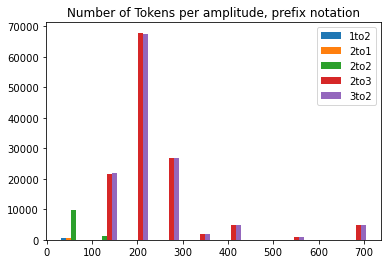

In [11]:
plt.hist(lengths_ampl_prefix, histtype="bar",
    label=["1to2", "2to1", "2to2", "2to3", "3to2"]);
plt.legend()
plt.title("Number of Tokens per amplitude, prefix notation")

Text(0.5, 1.0, 'Number of Tokens per amplitude, hprefix notation')

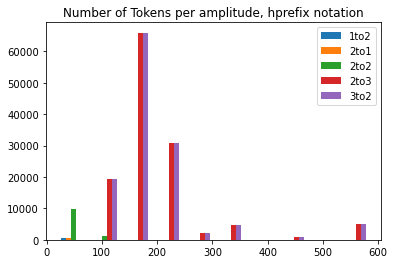

In [12]:
plt.hist(lengths_ampl_hprefix, histtype="bar",
    label=["1to2", "2to1", "2to2", "2to3", "3to2"]);
plt.legend()
plt.title("Number of Tokens per amplitude, hprefix notation")

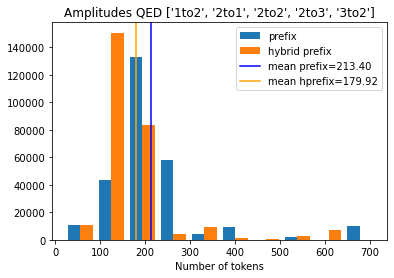

In [13]:
lengths_ampl_prefix_flat = np.concatenate(lengths_ampl_prefix).flat
lengths_ampl_hprefix_flat = np.concatenate(lengths_ampl_hprefix).flat
mean_prefix = np.mean(lengths_ampl_prefix_flat)
mean_hprefix = np.mean(lengths_ampl_hprefix_flat)
plt.hist([lengths_ampl_prefix_flat, lengths_ampl_hprefix_flat],
    label=["prefix", "hybrid prefix"]);
plt.title("Amplitudes QED {}".format(processes))
plt.axvline(mean_prefix, color="blue", label="mean prefix={:.2f}".format(mean_prefix))
plt.axvline(mean_hprefix, color="orange", label="mean hprefix={:.2f}".format(mean_hprefix))
plt.xlabel("Number of tokens")
plt.legend()
plt.savefig(figures_folder+"QED_amplitudes_lengths_comparison_p_hp.pdf")

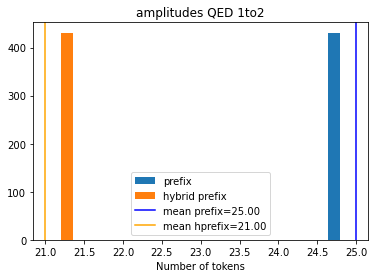

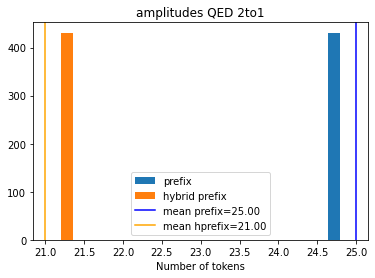

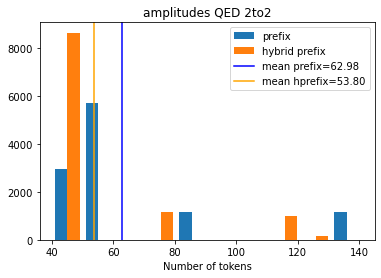

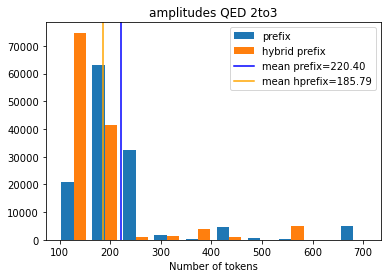

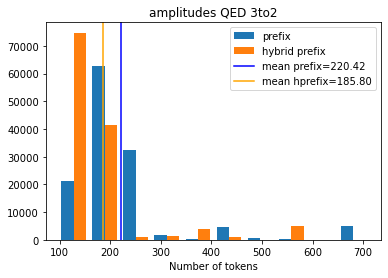

In [14]:
for i in range(len(amplitudes_prefix)):
    mean_prefix = np.mean(lengths_ampl_prefix[i])
    mean_hprefix = np.mean(lengths_ampl_hprefix[i])
    plt.hist([lengths_ampl_prefix[i], lengths_ampl_hprefix[i]],
        label=["prefix", "hybrid prefix"]);
    plt.title("amplitudes QED {}".format(processes[i]))
    plt.axvline(mean_prefix, color="blue", label="mean prefix={:.2f}".format(mean_prefix))
    plt.axvline(mean_hprefix, color="orange", label="mean hprefix={:.2f}".format(mean_hprefix))
    plt.legend()
    plt.xlabel("Number of tokens")
    # plt.xlim(0,600)
    plt.savefig(figures_folder+"QED_amplitudes_lengths_comparison_p_hp_"+processes[i]+".pdf")
    plt.show()

In [15]:
def filter_lengths_percentage(arr, max_len):
    """
    remove all with length > `max_length`
    return: (filteredarray, indices of old array), percentage of how many were kept
    """
    idxs = np.where([len(a)<=max_len for a in arr])[0]
    percentage = len(idxs) / len(arr)
    filtered = [arr[i] for i in idxs]
    return (filtered, idxs), percentage

In [48]:
ratios_kept_prefix = dict()
for max_length in range(0,600,20):
    ratios_kept_prefix_tmp = dict()
    for i, ampls in enumerate(amplitudes_prefix):
        ratio = filter_lengths_percentage(ampls, max_length)[1]
        ratios_kept_prefix_tmp[processes[i]] = ratio
    ratios_kept_prefix[max_length] = ratios_kept_prefix_tmp

In [49]:
ratios_kept_hprefix = dict()
for max_length in range(0,600,20):
    ratios_kept_hprefix_tmp = dict()
    for i, ampls in enumerate(amplitudes_hprefix):
        ratio = filter_lengths_percentage(ampls, max_length)[1]
        ratios_kept_hprefix_tmp[processes[i]] = ratio
    ratios_kept_hprefix[max_length] = ratios_kept_hprefix_tmp

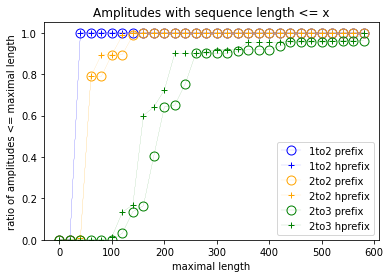

In [53]:
colors = ["blue", "red", "orange", "green", "purple", "black"]
for icol, process in enumerate(processes):
    if icol in [1, 4]:
        continue
    ratios_prefix_arr = []
    ratios_hprefix_arr = []
    lengths_arr = []
    for i, max_length in enumerate(ratios_kept_prefix.keys()):
        ratios_prefix_arr.append(ratios_kept_prefix[max_length][process])
        ratios_hprefix_arr.append(ratios_kept_hprefix[max_length][process])
        lengths_arr.append(max_length)
    plt.plot(lengths_arr, ratios_prefix_arr, label=process+" prefix", marker="o", markersize=9, c=colors[icol], fillstyle='none',
        lw=0.1)
    plt.plot(lengths_arr, ratios_hprefix_arr, label=process+" hprefix", marker="+", c=colors[icol], lw=0.1)
plt.legend()
plt.xlabel("maximal length")
plt.ylabel("ratio of amplitudes <= maximal length")
plt.ylim(0.0,1.05)
plt.title("Amplitudes with sequence length <= x");
plt.savefig(figures_folder+"QED_amplitudes_percentiles_comparison.pdf")

In [80]:
# all amplitudes combined
def flatten(l):
    return [item for sublist in l for item in sublist]

max_length = 300
print("Amplitudes prefix < {} tokens: {}".format(max_length, filter_lengths_percentage(flatten(amplitudes_prefix), max_length)[1]))
print("Amplitudes hprefix < {} tokens: {}".format(max_length, filter_lengths_percentage(flatten(amplitudes_hprefix), max_length)[1]))

Amplitudes prefix < 300 tokens: 0.9060815042375236
Amplitudes hprefix < 300 tokens: 0.9210230831088267


# Squared Amplitudes

In [25]:
for ctr in ctrs_sqampl_prefix:
    total = counter_get_total(ctr)
    prod_percentage = ctr['Prod'] / total
    sum_percentage = ctr['Sum'] / total
    ic(prod_percentage)
    ic(sum_percentage)

ic| prod_percentage: 0.29727187206020694
ic| sum_percentage: 0.08109125117591721
ic| prod_percentage: 0.29727187206020694
ic| sum_percentage: 0.08109125117591721
ic| prod_percentage: 0.2849747601138297
ic| sum_percentage: 0.1591369205091695
ic| prod_percentage: 0.34255966818419853
ic| sum_percentage: 0.13759752748354406
ic| prod_percentage: 0.3425569981336667
ic| sum_percentage: 0.13759983565559294


In [23]:
for ctr in ctrs_sqampl_hprefix:
    total = counter_get_total(ctr)
    prod_percentage = ctr['Prod'] / total
    sum_percentage = ctr['Sum'] / total
    prod_percentage_2 = ctr['Prod('] / total
    sum_percentage_2 = ctr['Sum('] / total
    ic(prod_percentage+prod_percentage_2)
    ic(sum_percentage+sum_percentage_2)

ic| prod_percentage+prod_percentage_2: 0.21618062088428974
ic| sum_percentage+sum_percentage_2: 0.08109125117591721
ic| prod_percentage+prod_percentage_2: 0.21618062088428974
ic| sum_percentage+sum_percentage_2: 0.08109125117591721
ic| prod_percentage+prod_percentage_2: 0.19593653826223703
ic| sum_percentage+sum_percentage_2: 0.049308562648414586
ic| prod_percentage+prod_percentage_2: 0.17277434203402606
ic| sum_percentage+sum_percentage_2: 0.012591221354064205
ic| prod_percentage+prod_percentage_2: 0.1727765696879931
ic| sum_percentage+sum_percentage_2: 0.012592134346448718


In [26]:
print("prefix Prod")
for ctr in ctrs_sqampl_prefix:
    total= counter_get_total(ctr)
    prod_percentage = (ctr['Prod'] + ctr['Prod(']) / total
    print(prod_percentage)

print("hprefix Prod")
for ctr in ctrs_sqampl_hprefix:
    total= counter_get_total(ctr)
    prod_percentage = (ctr['Prod'] + ctr['Prod(']) / total
    print(prod_percentage)

print("prefix Sum")
for ctr in ctrs_sqampl_prefix:
    total= counter_get_total(ctr)
    prod_percentage = (ctr['Sum'] + ctr['Sum(']) / total
    print(prod_percentage)

print("hprefix Sum")
for ctr in ctrs_sqampl_hprefix:
    total= counter_get_total(ctr)
    prod_percentage = (ctr['Sum'] + ctr['Sum(']) / total
    print(prod_percentage)

prefix Prod
0.29727187206020694
0.29727187206020694
0.2849747601138297
0.34255966818419853
0.3425569981336667
hprefix Prod
0.21618062088428974
0.21618062088428974
0.19593653826223703
0.17277434203402606
0.1727765696879931
prefix Sum
0.08109125117591721
0.08109125117591721
0.1591369205091695
0.13759752748354406
0.13759983565559294
hprefix Sum
0.08109125117591721
0.08109125117591721
0.049308562648414586
0.012591221354064205
0.012592134346448717


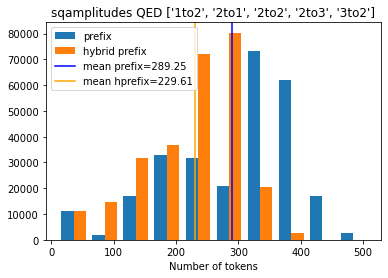

In [27]:
lengths_sqampl_prefix_flat = np.concatenate(lengths_sqampl_prefix).flat
lengths_sqampl_hprefix_flat = np.concatenate(lengths_sqampl_hprefix).flat
mean_prefix = np.mean(lengths_sqampl_prefix_flat)
mean_hprefix = np.mean(lengths_sqampl_hprefix_flat)
plt.hist([lengths_sqampl_prefix_flat, lengths_sqampl_hprefix_flat],
    label=["prefix", "hybrid prefix"]);
plt.title("sqamplitudes QED {}".format(processes))
plt.axvline(mean_prefix, color="blue", label="mean prefix={:.2f}".format(mean_prefix))
plt.axvline(mean_hprefix, color="orange", label="mean hprefix={:.2f}".format(mean_hprefix))
plt.xlabel("Number of tokens")
plt.legend()
plt.savefig(figures_folder+"QED_sqamplitudes_lengths_comparison_p_hp.pdf")

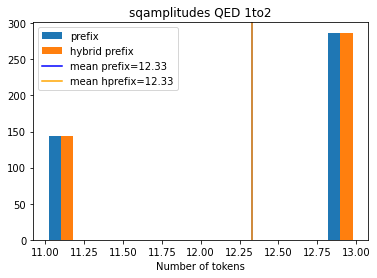

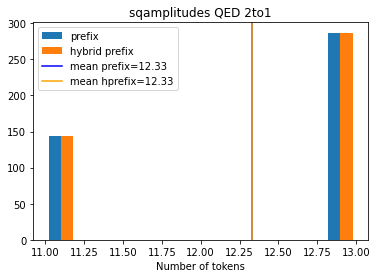

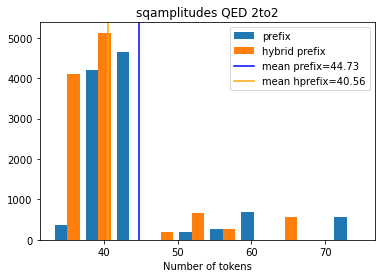

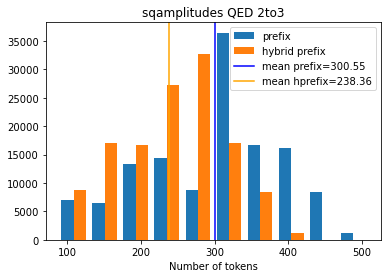

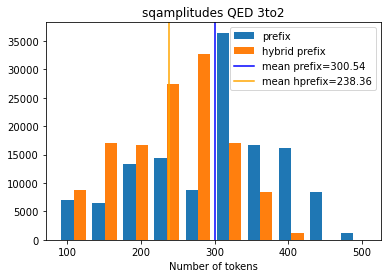

In [28]:
for i in range(len(sqamplitudes_prefix)):
    mean_prefix = np.mean(lengths_sqampl_prefix[i])
    mean_hprefix = np.mean(lengths_sqampl_hprefix[i])
    plt.hist([lengths_sqampl_prefix[i], lengths_sqampl_hprefix[i]],
        label=["prefix", "hybrid prefix"]);
    plt.title("sqamplitudes QED {}".format(processes[i]))
    plt.axvline(mean_prefix, color="blue", label="mean prefix={:.2f}".format(mean_prefix))
    plt.axvline(mean_hprefix, color="orange", label="mean hprefix={:.2f}".format(mean_hprefix))
    plt.legend()
    plt.xlabel("Number of tokens")
    # plt.xlim(0,600)
    plt.savefig(figures_folder+"QED_sqamplitudes_lengths_comparison_p_hp_"+processes[i]+".pdf")
    plt.show()

In [58]:
ratios_kept_prefix = dict()
for max_length in range(0,600,20):
    ratios_kept_prefix_tmp = dict()
    for i, sqampls in enumerate(sqamplitudes_prefix):
        ratio = filter_lengths_percentage(sqampls, max_length)[1]
        ratios_kept_prefix_tmp[processes[i]] = ratio
    ratios_kept_prefix[max_length] = ratios_kept_prefix_tmp

In [68]:
ratios_kept_hprefix = dict()
for max_length in range(0,600,20):
    ratios_kept_hprefix_tmp = dict()
    for i, sqampls in enumerate(sqamplitudes_hprefix):
        ratio = filter_lengths_percentage(sqampls, max_length)[1]
        ratios_kept_hprefix_tmp[processes[i]] = ratio
    ratios_kept_hprefix[max_length] = ratios_kept_hprefix_tmp

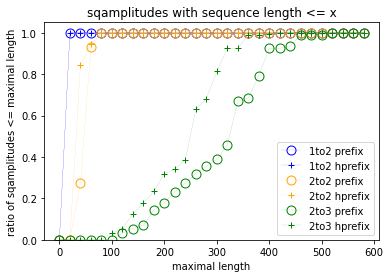

In [69]:
colors = ["blue", "red", "orange", "green", "purple", "black"]
for icol, process in enumerate(processes):
    if icol in [1, 4]:
        continue
    ratios_prefix_arr = []
    ratios_hprefix_arr = []
    lengths_arr = []
    for i, max_length in enumerate(ratios_kept_prefix.keys()):
        ratios_prefix_arr.append(ratios_kept_prefix[max_length][process])
        ratios_hprefix_arr.append(ratios_kept_hprefix[max_length][process])
        lengths_arr.append(max_length)
    plt.plot(lengths_arr, ratios_prefix_arr, label=process+" prefix", marker="o", markersize=9, c=colors[icol], fillstyle='none',
        lw=0.1)
    plt.plot(lengths_arr, ratios_hprefix_arr, label=process+" hprefix", marker="+", c=colors[icol], lw=0.1)
plt.legend()
plt.xlabel("maximal length")
plt.ylabel("ratio of sqamplitudes <= maximal length")
plt.ylim(0.0,1.05)
plt.title("sqamplitudes with sequence length <= x");
plt.savefig(figures_folder+"QED_sqamplitudes_percentiles_comparison.pdf")

In [81]:
# all sqamplitudes combined
def flatten(l):
    return [item for sublist in l for item in sublist]

max_length = 300
print("sqamplitudes prefix < {} tokens: {}".format(max_length, filter_lengths_percentage(flatten(sqamplitudes_prefix), max_length)[1]))
print("sqamplitudes hprefix < {} tokens: {}".format(max_length, filter_lengths_percentage(flatten(sqamplitudes_hprefix), max_length)[1]))

sqamplitudes prefix < 300 tokens: 0.4146547539197557
sqamplitudes hprefix < 300 tokens: 0.8226391601291083


# Sequence length probabilities

In [93]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

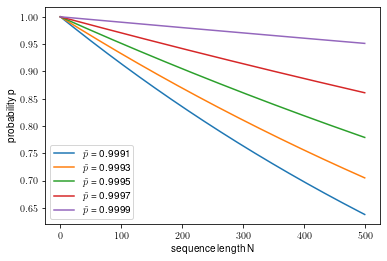

In [104]:
probs = [0.9991, .9993, 0.9995, 0.9997, 0.9999]
for prob in probs:
    label = r"$\tilde{p}$ = " + str(prob)
    seq_lengths = np.array(range(0,500, 1))
    full_prob = np.power(prob, seq_lengths)
    plt.plot(seq_lengths, full_prob, label=label)
plt.xlabel("sequence length N")
plt.ylabel("probability p")
plt.legend()
plt.savefig(figures_folder + "probabilities.pdf")

In [102]:
ic(0.9997**300);
ic(0.9999**300);

ic| 0.9997**300: 0.9139188448153814
ic| 0.9999**300: 0.9704440777842511
